# TITANIC CLASSIFICATION #

In [1]:
#import all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Load the dataset
df = pd.read_csv('SVMtrain.csv')
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
5,6,0,3,Male,60.0,0,0,8.4583,2
6,7,0,1,Male,54.0,0,0,51.8625,3
7,8,0,3,Male,2.0,3,1,21.0750,3
8,9,1,3,female,27.0,0,2,11.1333,3
9,10,1,2,female,14.0,1,0,30.0708,1


In [4]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [5]:
#Determine the Null value in the dataset
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Encode Sex
from sklearn.preprocessing import LabelEncoder
what_to_encode = ['Sex']
encoder = LabelEncoder()
for col in what_to_encode:
    df[col] =encoder.fit_transform(df[col])
    print('..................Encoding COlumns..............')
df.head(10)


..................Encoding COlumns..............


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,3
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,3
3,4,1,1,1,35.0,1,0,53.1000,3
4,5,0,3,0,35.0,0,0,8.0500,3
5,6,0,3,0,60.0,0,0,8.4583,2
6,7,0,1,0,54.0,0,0,51.8625,3
7,8,0,3,0,2.0,3,1,21.0750,3
8,9,1,3,1,27.0,0,2,11.1333,3
9,10,1,2,1,14.0,1,0,30.0708,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


# EXPLORAT0RY DATA ANALYSIS #

In [ ]:
## CORRELATION IN DATA FEATURES ##

In [10]:
import seaborn as sns
plt.figure(figsize=(12,8))

correlation = df.corr()

<Figure size 1200x800 with 0 Axes>

In [11]:
print(correlation)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005028 -0.035330 -0.043136  0.008341 -0.057686   
Survived       -0.005028  1.000000 -0.335549  0.541585 -0.116558 -0.034040   
Pclass         -0.035330 -0.335549  1.000000 -0.127741 -0.122449  0.081656   
Sex            -0.043136  0.541585 -0.127741  1.000000 -0.102014  0.116348   
Age             0.008341 -0.116558 -0.122449 -0.102014  1.000000 -0.156777   
SibSp          -0.057686 -0.034040  0.081656  0.116348 -0.156777  1.000000   
Parch          -0.001657  0.083151  0.016824  0.247508 -0.215191  0.414542   
Fare            0.012703  0.255290 -0.548193  0.179958 -0.003307  0.160887   
Embarked        0.013166 -0.169718  0.164681 -0.110320 -0.124894  0.068900   

                Parch      Fare  Embarked  
PassengerId -0.001657  0.012703  0.013166  
Survived     0.083151  0.255290 -0.169718  
Pclass       0.016824 -0.548193  0.164681  
Sex          0.247508  0.179958 -0.110320  

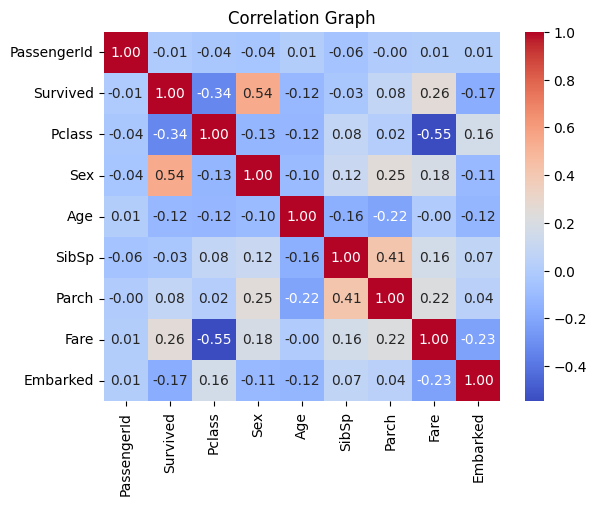

In [13]:
sns.heatmap(data=correlation, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Graph')
plt.show()

In [16]:
#Spliting the Dataset into Features and Target Variable
# Define features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

In [17]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Sex          889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.7 KB
None


In [18]:
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 889 entries, 0 to 888
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB
None


In [19]:
#Splitting the dataset into 80% for training and 20% fro testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
#print the shape of the feature and target variables
print('Features shape is', X_train.shape)
print('Testing Shape ', y_test.shape )

Features shape is (711, 8)
Testing Shape  (178,)


In [21]:
# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



c:\Users\USER\OneDrive\Desktop\datascience class\FINAL WORK\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

Accuracy of the Logistic Regression model: 0.7921348314606742


In [26]:
# Initialize and train different models
models = {
    "Linear Regression": LinearRegression(),
     "Logistic Regression": LogisticRegression()
      
    
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    

    results[name] = {"MAE": mae, "R-squared": r2, }

# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")

    print("-" * 20)

Model: Linear Regression
  MAE: 0.2919
  R-squared: 0.3932
--------------------
Model: Logistic Regression
  MAE: 0.2079
  R-squared: 0.1243
--------------------


c:\Users\USER\OneDrive\Desktop\datascience class\FINAL WORK\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Compare model performance
print("Model Performance:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

Model Performance:

Linear Regression:
MAE: 0.2919
R-squared: 0.3932

Logistic Regression:
MAE: 0.2079
R-squared: 0.1243


In [28]:
# Choose the best performing model based on evaluation metrics
# Example: Select the model with the lowest MAE
best_model_name = min(results, key=lambda k: results[k]['MAE'])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Logistic Regression
